In [1]:
from numberplate_extractor.number_plate_reader import NumberPlateReader
from PIL import Image
import matplotlib.pyplot as plt
import os

/Users/elliottcooper/Desktop/Number-Plate-Recognition/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
number_plate_reader = NumberPlateReader()

/Users/elliottcooper/Desktop/Number-Plate-Recognition/venv/lib/python3.11/site-packages/transformers/models/yolos/feature_extraction_yolos.py:38: FutureWarning: The class YolosFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use YolosImageProcessor instead.
  warnings.warn(
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
/Users/elliottcooper/Desktop/Number-Plate-Recognition/venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
# Set entire run in one function
def extract_plate(image_path):
    image = Image.open(image_path)
    number_plate = number_plate_reader.get_number_plate(image)
    number_plate_string = number_plate_reader.read_number_plate(number_plate)
    return number_plate_string, image, number_plate

In [4]:
# Read example data directory
directory = 'example_data'
files = os.listdir(directory)
image_extensions = ('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff')
image_files = [os.path.join(directory, file) for file in files if file.lower().endswith(image_extensions)]
number_of_examples = len(image_files)

In [5]:
# Append output to array
outputs = []
for path in image_files:
    outputs.append((extract_plate(path)))


`post_process` is deprecated and will be removed in v5 of Transformers, please use `post_process_object_detection` instead, with `threshold=0.` for equivalent results.


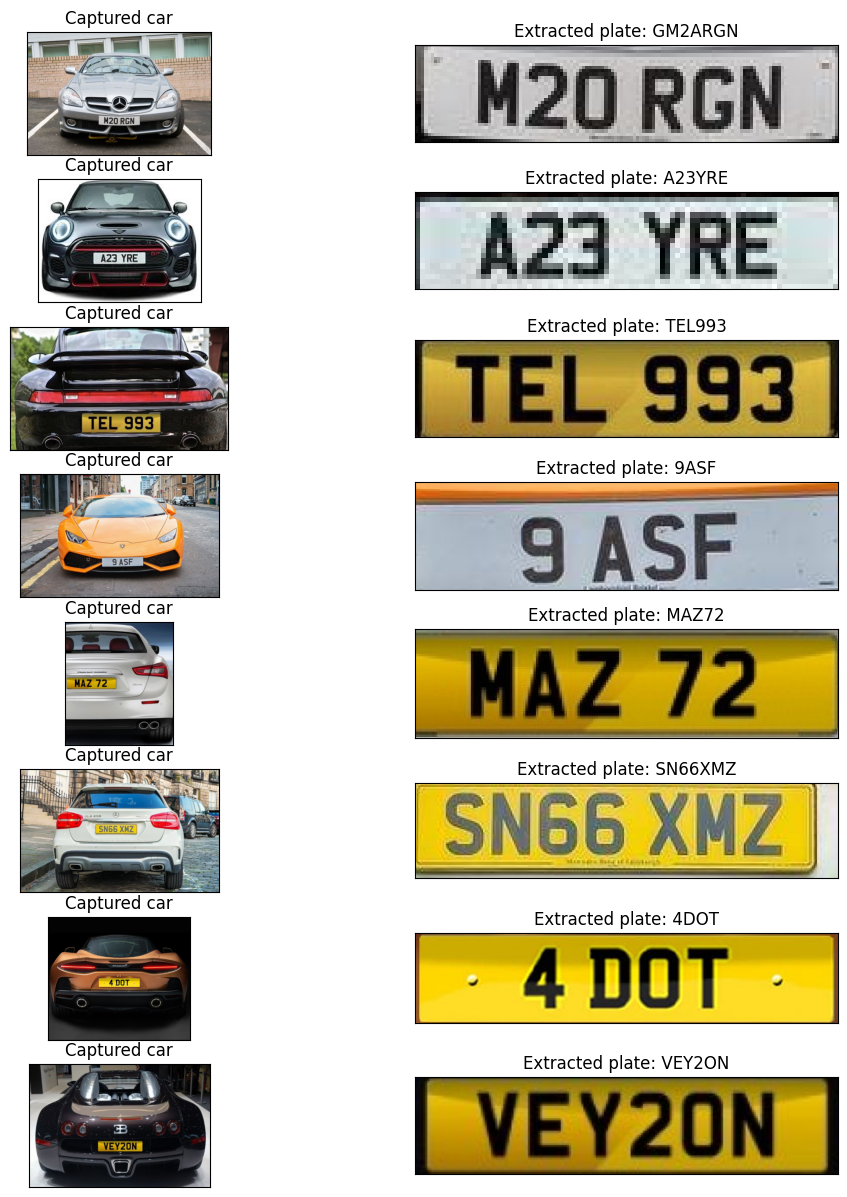

In [7]:
# Plot outputs and their extracted string

fig, axes = plt.subplots(number_of_examples, 2, figsize=(12, 15))
flat_axes = axes.flat

i = 0
current_example = 0
while (i < len(flat_axes)):
    flat_axes[i].imshow(outputs[current_example][1])
    flat_axes[i].set_title("Captured car")
    flat_axes[i].set_xticks([])
    flat_axes[i].set_yticks([])

    flat_axes[i+1].imshow(outputs[current_example][2])
    flat_axes[i+1].set_title(f"Extracted plate: {outputs[current_example][0]}")
    flat_axes[i+1].set_xticks([])
    flat_axes[i+1].set_yticks([])

    current_example += 1
    i+=2
    